# Backup for project 

reference 1: 
According to wine writer and competition organizer Dan Berger, one of the most important criteria in evaluating wine competitions is the quality of the judges. Before agreeing to enter, he advises, be sure to check the competition's website for a list of participating judges. "They should be skilled tasters--professionals, not wine collectors," he says.

"Both the high-priced panel and the low-priced panel are prejudiced against their own wines. If you know you're judging the low-priced wines, you say to yourself, 'Well, there can't be anything worth a gold in here.' If you're judging the \\$30-and-above wines, that panel's going say, 'I wouldn't pay \\$30 for any of this crap.' So the end result is that you get a smaller percentage of gold medals for both high- and low-priced wines."(ref:https://winesvinesanalytics.com/columns/section/23/article/50637/Wine-Competitions-That-Help-You-Sell, access: May 27 2020)

reference 2: 
The first experiment took place in 2005. The last was in Sacramento earlier this month. Hodgson's findings have stunned the wine industry. Over the years he has shown again and again that even trained, professional palates are terrible at judging wine.

"Only about 10% of judges are consistent and those judges who were consistent one year were ordinary the next year. says Hodgson "Chance has a great deal to do with the awards that wines win."

These judges are not amateurs either. They read like a who's who of the American wine industry from winemakers, sommeliers, critics and buyers to wine consultants and academics. In Hodgson's tests, judges rated wines on a scale running from 50 to 100. In practice, most wines scored in the 70s, 80s and low 90s.
(ref:https://www.theguardian.com/lifeandstyle/2013/jun/23/wine-tasting-junk-science-analysis, access: May 27 2020)

reference 3: 
how a wine competition works (ref: https://www.newyorkwines.org/awards-how-a-competition-works, access: May 27 2020)

reference 4: 
top 9 wine management software. only one references increasing sales. so potentially untapped market and no guarentee that they are even using statistics on known reviewers. (ref: https://www.predictiveanalyticstoday.com/top-winery-management-software/)

ref 5: 
scales of wine reviews, 80 barely acceptable wine, 90 becomes middle ground and 99 becomed best mark, 100 theoretical 
https://www.delongwine.com/blogs/de-long-wine-moment/14610147-how-we-rate-wines-and-other-things
https://cdn.shopify.com/s/files/1/0527/6177/files/how_we_rate_wines.pdf?2489


# Quick Look at the wine_reviews_150k.csv 

importing, and graphing some basic aspects of the wine reviews to see if: 
- there is enough data per wine taster (at least 50 reviews of a variety of wine) 
- graph a few metrics vs. wine taster 
    - number of white/reds reviewed  
    - average score w/ highest and lowest marked
    - tags for the taste of the wine (clusters/counting?)

In [3]:
# graph imformation
%matplotlib notebook
import matplotlib.pyplot as plt #matlab plots
import seaborn as sns 
sns.set_style('whitegrid') # style preference on graphs

#useful packages for math, statistics and dictionaries 
from scipy import stats 
import numpy as np  
import collections #ordered dictionary

#importing,cleaning and managing datasets 
import pandas as pd 
from pandas import Series,DataFrame

#machine learning packages
from sklearn import ensemble, tree, model_selection 
# ensemble = random forest
# tree = decision tree 

# for generating random seeds in the game 
from random import seed, random
# seed random number generator
seed(1)

from ansimarkup import parse, ansiprint # colour print statements
import time # adds delays for gamer to read script

In [4]:
# load data set 
#wine_150 = pd.read_csv("./data/wine_reviews_150k.csv")
wine_130 = pd.read_csv("../data/wine_reviews_130k.csv")

In [5]:
#wine_150 = wine_150.loc[:, ~wine_150.columns.str.contains('^Unnamed')]
wine_130 = wine_130.loc[:, ~wine_130.columns.str.contains('^Unnamed')]
#print(wine_150.head(),wine_150.info(), sep='\n') 
print(wine_130.head(), wine_130.info(), sep='\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB
    country                   

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[10776, 25514, 9532, 415, 15134, 4415, 9537, 6332, 26244, 4966, 4177, 5147, 3685, 1835, 514, 491, 1085, 139, 27, 6]


<IPython.core.display.Javascript object>


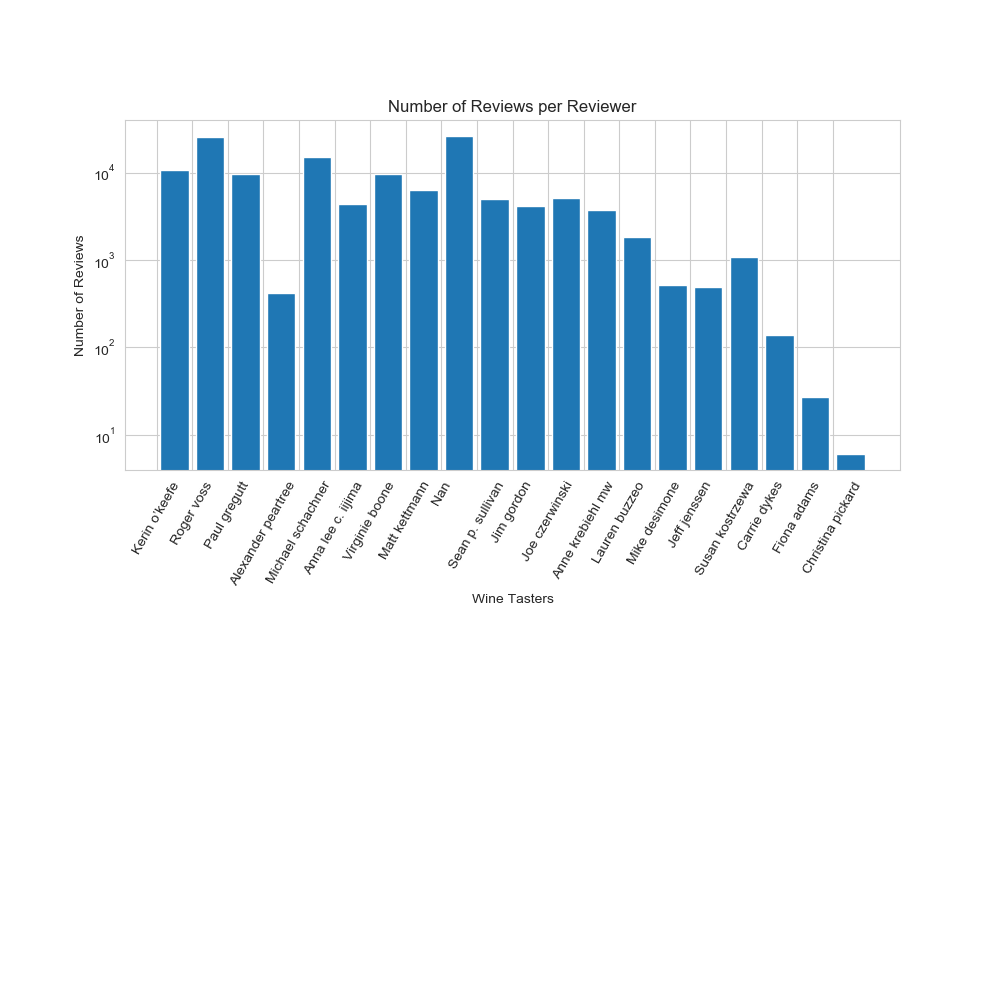

In [76]:
taster_dic = {}

for x in range(len(wine_130)): 
    name = str(wine_130.loc[x, 'taster_name']).capitalize().strip()
   # print(gender, type(gender))
    
    if name not in taster_dic: 
        taster_dic[name] = 0
    
    taster_dic[name] += 1

#print(taster_dic)

x = np.array(range(len(taster_dic)))
print(x)
y = list(taster_dic.values())
y_name = list(taster_dic.keys())
print(y)
width = 0.1
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(211)
plt.bar(x, y) #taster_dic.values()
plt.yscale('log')
plt.title('Number of Reviews per Reviewer')
plt.xlabel('Wine Tasters')
plt.ylabel('Number of Reviews')
plt.xticks(x-0.5,y_name, rotation=60)

#ax= fig.add_subplot(212)
#sns.distplot(y, bins=18)

plt.show()

In [8]:

print(wine_130.iloc[0:6] )
#wine_130['taster_name'] = wine_130['taster_name'].astype(str)
#print(wine_130[wine_130["taster_name"].str.match('Anna lee')])
#print(wine_130[wine_130["taster_name"].str.match('Anne krebiehl')])

    country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   
5     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   
5                        Ars In Vitro      87   15.0     Northern Spain   

           

In [44]:
cols = [0,1,3,8]
#df = df[df.columns[cols]]
print(wine_130[wine_130.columns[cols]])

         country                                        description  points  \
0          Italy  Aromas include tropical fruit, broom, brimston...      87   
1       Portugal  This is ripe and fruity, a wine that is smooth...      87   
2             US  Tart and snappy, the flavors of lime flesh and...      87   
3             US  Pineapple rind, lemon pith and orange blossom ...      87   
4             US  Much like the regular bottling from 2012, this...      87   
...          ...                                                ...     ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...      90   
129967        US  Citation is given as much as a decade of bottl...      90   
129968    France  Well-drained gravel soil gives this wine its c...      90   
129969    France  A dry style of Pinot Gris, this is crisp with ...      90   
129970    France  Big, rich and off-dry, this is powered by inte...      90   

               taster_name  
0            Kerin O’K

In [10]:
print(wine_130.iloc[1120,1])


Chardonay and Pinot Noir are both present in this apple and pear flavored wine. A lively mousse brings out the fruit and acidity, giving a tangy, bright wine that's ready to drink now.


80
100
89    12226
Name: points, dtype: int64


<IPython.core.display.Javascript object>


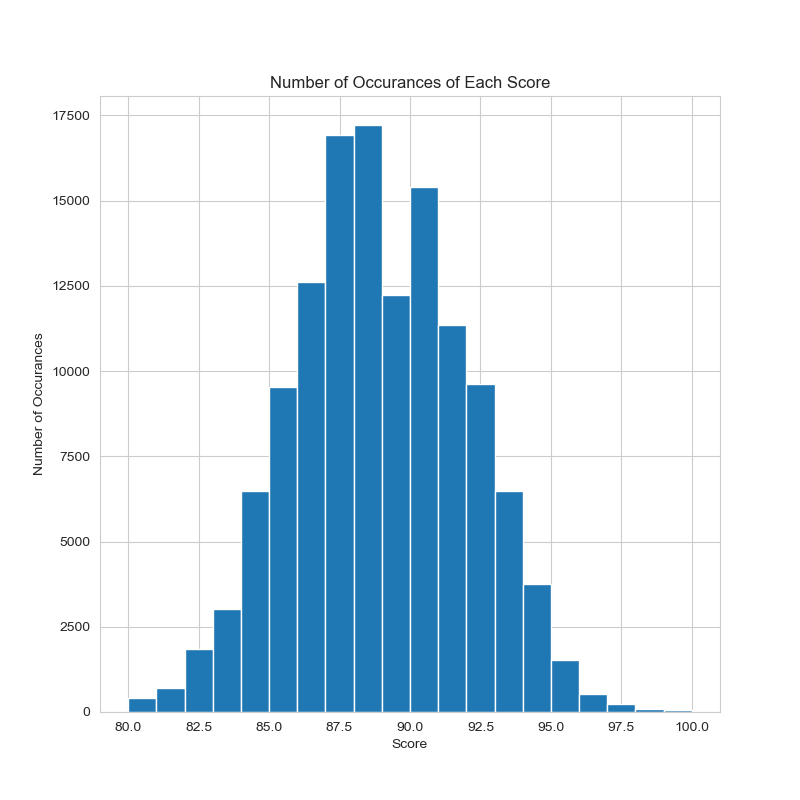

In [11]:
print(min(wine_130['points']))
print(max(wine_130['points']))
counts_89 = wine_130["points"][wine_130["points"] == 89].value_counts()
print(counts_89)
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(111)

plt.hist(wine_130['points'], bins=20)
plt.title('Number of Occurances of Each Score')
plt.xlabel('Score')
plt.ylabel('Number of Occurances')

plt.show()

In [6]:
# first run at NLP with NLTK 
import os 
import nltk, re, pprint 
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import nltk.corpus
#nltk.download('punkt')
#nltk.download('stopwords')

first_10 = wine_130[wine_130['taster_name'] == 'Kerin O’Keefe']
#print(first_10)

usr_defined_stop = ['.', ',',"'s", 'is', "n't"]
stop = nltk.corpus.stopwords.words('english')
#i = nltk.corpus.stopwords.words('english')
stopwords= set(stop).union(usr_defined_stop)
#print(stopwords)

tokens = first_10['description'].str.lower().apply(word_tokenize) #sentence tokenization, 

def stopword_clean(token_pd): 
    for index,row in token_pd.iteritems(): 
        for y in row: 
            if y in stopwords: 
                row.remove(y)
    return token_pd
tokens = stopword_clean(tokens)
            
#print(tokens)

In [7]:
tokens = stopword_clean(tokens)
tokens = stopword_clean(tokens)
print(tokens)
"the" in stopwords

0         [aromas, include, tropical, fruit, broom, brim...
6         [bright, informal, red, opens, aromas, candied...
13        [dominated, oak, oak-driven, aromas, include, ...
22        [delicate, aromas, recall, white, flower, citr...
24        [aromas, prune, blackcurrant, toast, oak, carr...
                                ...                        
129893    [aromas, passion, fruit, hay, vegetal, note, l...
129943    [blend, nero, d'avola, syrah, conveys, aromas,...
129947    [blend, 65, %, cabernet, sauvignon, 30, %, mer...
129961    [intense, aromas, wild, cherry, baking, spice,...
129962    [blackberry, cassis, grilled, herb, toasted, a...
Name: description, Length: 10776, dtype: object


True

In [21]:
#nltk.download('brown')
brown = nltk.corpus.brown.words()
print(brown)


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [29]:
"%" in brown

False

In [13]:
full_text = []
test = []
token_list = tokens.tolist()

for row in token_list: 
    test = test + row
    for word in row:
        full_text.append(word)

freq = nltk.FreqDist(full_text)
print(len(freq))
print(len(test))
print(freq.most_common(20))

4114
299364
[('palate', 9984), ('aromas', 8516), ('tannins', 6409), ('cherry', 5786), ('black', 5055), ('offers', 4607), ('alongside', 4488), ('acidity', 3913), ('fruit', 3436), ('white', 3274), ('berry', 3118), ('drink', 3062), ('red', 3014), ('ripe', 2856), ('spice', 2848), ('note', 2772), ('opens', 2708), ('pepper', 2483), ('%', 2277), ('finish', 2220)]


4114


<IPython.core.display.Javascript object>


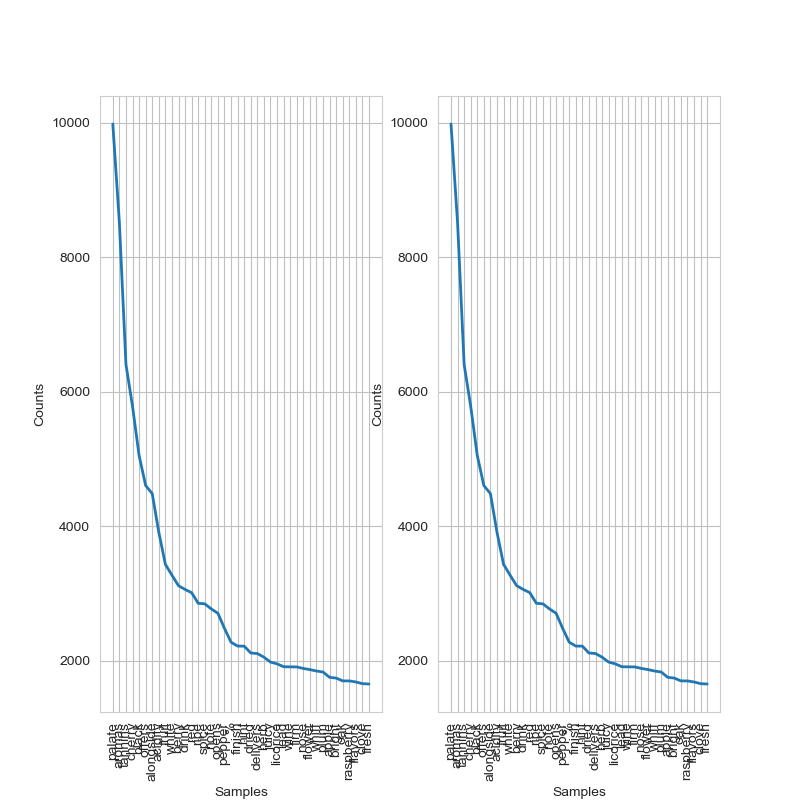

True
True


In [15]:
test_freq = nltk.FreqDist(test)
print(len(test_freq))

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(121)
freq.plot(40,cumulative=False)

ax=fig.add_subplot(122)
test_freq.plot(40,cumulative=False)

print(test_freq==freq)
print(full_text==test)

In [52]:
first_10 = wine_130[wine_130['taster_name'] == 'Kerin O’Keefe']

test_tag_words = freq.most_common(20)

#test_tag_words = ['fruit', 'oak', 'dry', 'sweet', 'light', 'full bodied', 'toasted', 'red', 'rose', 'white',\
 #                 'sparkling', 'herb', 'tannin', 'berry', 'acidity', 'citrus', 'pepper' ]
first_10 = first_10.drop(['taster_twitter_handle', 'title', 'region_2'], axis=1)

for x in test_tag_words: 
    first_10[x[0]] = 0 
    
print(first_10)

       country                                        description  \
0        Italy  Aromas include tropical fruit, broom, brimston...   
6        Italy  Here's a bright, informal red that opens with ...   
13       Italy  This is dominated by oak and oak-driven aromas...   
22       Italy  Delicate aromas recall white flower and citrus...   
24       Italy  Aromas of prune, blackcurrant, toast and oak c...   
...        ...                                                ...   
129893   Italy  Aromas of passion fruit, hay and a vegetal not...   
129943   Italy  A blend of Nero d'Avola and Syrah, this convey...   
129947   Italy  A blend of 65% Cabernet Sauvignon, 30% Merlot ...   
129961   Italy  Intense aromas of wild cherry, baking spice, t...   
129962   Italy  Blackberry, cassis, grilled herb and toasted a...   

                      designation  points  price           province  \
0                    Vulkà Bianco      87    NaN  Sicily & Sardinia   
6                         Bel

In [182]:
print(type(tokens))
print(len(tokens[0]))
print(tokens[0],tokens[0][5])

<class 'pandas.core.series.Series'>
22
['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone', 'dried', 'herb', 'the', 'palate', "n't", 'overly', 'expressive', 'offering', 'unripened', 'apple', 'citrus', 'dried', 'sage', 'alongside', 'brisk', 'acidity'] brimstone


In [54]:
for x in test_tag_words: 
    print(x[0])
    

for index, row in tokens.iteritems(): 
    for y in row: 
        if y in test_tag_words: 
            print('in:', y, index)
            first_10.at[index, y] = 1
            
print(first_10.iloc[:,15:29])

palate
aromas
tannins
cherry
black
offers
alongside
acidity
fruit
white
berry
drink
red
ripe
spice
note
opens
pepper
%
finish
        offers  alongside  acidity  fruit  white  berry  drink  red  ripe  \
0            0          0        0      0      0      0      0    0     0   
6            0          0        0      0      0      0      0    0     0   
13           0          0        0      0      0      0      0    0     0   
22           0          0        0      0      0      0      0    0     0   
24           0          0        0      0      0      0      0    0     0   
...        ...        ...      ...    ...    ...    ...    ...  ...   ...   
129893       0          0        0      0      0      0      0    0     0   
129943       0          0        0      0      0      0      0    0     0   
129947       0          0        0      0      0      0      0    0     0   
129961       0          0        0      0      0      0      0    0     0   
129962       0          0  

In [172]:
def fill_dic(dic, pd_data, column): 
    for index,row in pd_data.iterrows(): 
        cell = str(pd_data.at[index,'%s' %column]) #.capatalize().strip()
    if cell not in dic: 
        dic[cell] = 0 
    dic[cell] += 1
    
    return dic

region_dic2 = {}

region_dic2 = fill_dic(region_dic2, first_10, 'region_1')

print(region_dic)

{'Etna': 200, 'Vittoria': 19, 'Sicilia': 281, 'Terre siciliane': 213, 'Cerasuolo di vittoria': 9, 'Romagna': 63, 'Aglianico del vulture': 54, 'Vernaccia di san gimignano': 104, 'Toscana': 544, 'Morellino di scansano': 140, 'Chianti classico': 768, 'Brunello di montalcino': 783, 'Alto adige': 408, 'Sagrantino di montefalco': 21, 'Barolo': 1127, 'Gavi': 28, 'Franciacorta': 174, 'Vino nobile di montepulciano': 212, 'Amarone della valpolicella': 114, 'Alto adige valle isarco': 40, "Dolcetto d'alba": 33, 'Collio': 282, 'Dogliani superiore': 6, "Barbera d'alba": 80, 'Cortona': 32, 'Piemonte': 7, 'Colli della toscana centrale': 10, 'Barbaresco': 559, 'Verdicchio dei castelli di jesi classico': 48, 'Rosso di montalcino': 233, "Nebbiolo d'alba": 33, 'Sannio': 8, 'Coste della sesia': 13, 'Greco di tufo': 71, 'Langhe': 61, 'Rosso di montepulciano': 105, 'Basilicata': 7, 'Campania': 33, 'Nan': 27, 'Trentino': 53, "Valle d'aosta": 5, 'Alto adige terlano': 10, 'Amarone della valpolicella classico': 

In [175]:
region_dic = {}

for index,row in first_10.iterrows():
    #print(index, row)
    region = str(first_10.at[index, 'region_1']).capitalize().strip()
    
    if region not in region_dic: 
        region_dic[region] = 0
    
    region_dic[region] += 1
    
    
if region_dic == region_dic2: 
    print(yes)